# Proyecto Final MedCamp - FS Machine Learning Bootcamp

In [1]:
# sin considerar Preseleccion de variable : 'City_Type', y "Rango_Edad"
# Aplicando Balanceo
# el accuracy del modelo en data de testing es:  

# Cargando Data Train

In [2]:
import pandas as pd

In [3]:
datatest = pd.read_csv("dato\Test.csv",header=0, parse_dates=['Registration_Date'])

In [4]:
datatrain = pd.read_csv("dato\Train.csv",header=0, parse_dates=['Registration_Date'])

In [5]:
datatrain['flagdata'] = datatrain.apply(lambda row: 1,axis = 1)

In [6]:
datatest['flagdata'] = datatest.apply(lambda row: 2,axis = 1)

In [7]:
datatest.flagdata.unique()

array([2], dtype=int64)

In [8]:
datatrain.flagdata.unique()

array([1], dtype=int64)

In [9]:
datatrain = pd.concat([datatrain, datatest])

In [10]:
datatrain.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,flagdata
0,489652,6578,2005-09-10,4,0,0,0,2,1
1,507246,6578,2005-08-18,45,5,0,0,7,1
2,524931,6535,2004-02-07,0,0,0,0,0,1
3,494493,6570,2005-05-20,0,0,0,0,0,1
4,523001,6562,2005-05-22,0,0,0,0,0,1


In [11]:
#del datatrain["Registration_Date"]

In [12]:
datatrain.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,flagdata
0,489652,6578,2005-09-10,4,0,0,0,2,1
1,507246,6578,2005-08-18,45,5,0,0,7,1
2,524931,6535,2004-02-07,0,0,0,0,0,1
3,494493,6570,2005-05-20,0,0,0,0,0,1
4,523001,6562,2005-05-22,0,0,0,0,0,1


In [13]:
datatrain.shape

(75278, 9)

In [14]:
datatrain['PatCamp_ID'] = datatrain[['Patient_ID', 'Health_Camp_ID']].apply(lambda x: '_'.join(x.astype(str)),axis=1)

In [15]:
datatrain.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,flagdata,PatCamp_ID
0,489652,6578,2005-09-10,4,0,0,0,2,1,489652_6578
1,507246,6578,2005-08-18,45,5,0,0,7,1,507246_6578
2,524931,6535,2004-02-07,0,0,0,0,0,1,524931_6535
3,494493,6570,2005-05-20,0,0,0,0,0,1,494493_6570
4,523001,6562,2005-05-22,0,0,0,0,0,1,523001_6562


In [16]:
pd.DataFrame(datatrain.dtypes)

,0
Patient_ID,int64
Health_Camp_ID,int64
Registration_Date,datetime64[ns]
Var1,int64
Var2,int64
Var3,int64
Var4,int64
Var5,int64
flagdata,int64
PatCamp_ID,object


# Cargando Data CampDetail

In [17]:
campdetail = pd.read_csv("dato\Health_Camp_Detail.csv",header=0,parse_dates=['Camp_Start_Date','Camp_End_Date'])

In [18]:
campdetail.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,2003-08-16,2003-08-20,First,B,2
1,6530,2003-08-16,2003-10-28,First,C,2
2,6544,2003-11-03,2003-11-15,First,F,1
3,6585,2003-11-22,2003-12-05,First,E,2
4,6561,2003-11-30,2003-12-18,First,E,1


In [19]:
#del campdetail["Camp_Start_Date"]
#del campdetail["Camp_End_Date"]

In [20]:
campdetail.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,2003-08-16,2003-08-20,First,B,2
1,6530,2003-08-16,2003-10-28,First,C,2
2,6544,2003-11-03,2003-11-15,First,F,1
3,6585,2003-11-22,2003-12-05,First,E,2
4,6561,2003-11-30,2003-12-18,First,E,1


In [21]:
datatrain.Health_Camp_ID.unique()

array([6578, 6535, 6570, 6562, 6538, 6527, 6585, 6539, 6543, 6536, 6554,
       6526, 6549, 6586, 6580, 6542, 6552, 6555, 6523, 6564, 6558, 6561,
       6544, 6540, 6532, 6546, 6569, 6581, 6560, 6587, 6530, 6524, 6531,
       6563, 6557, 6553, 6565, 6534, 6529, 6571, 6541, 6528, 6537, 6575],
      dtype=int64)

In [22]:
campdetail.Health_Camp_ID.unique()

array([6560, 6530, 6544, 6585, 6561, 6581, 6564, 6557, 6538, 6546, 6535,
       6553, 6565, 6552, 6539, 6558, 6563, 6569, 6586, 6540, 6562, 6531,
       6580, 6526, 6536, 6542, 6532, 6523, 6524, 6527, 6554, 6549, 6570,
       6587, 6578, 6555, 6543, 6537, 6571, 6575, 6534, 6541, 6528, 6529],
      dtype=int64)

In [ ]:
union1 = datatrain.merge(campdetail, left_on = ['Health_Camp_ID'],
                right_on= ['Health_Camp_ID'],
                how = 'inner')

In [24]:
union1.shape

(75278, 15)

In [25]:
union1.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,flagdata,PatCamp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,489652,6578,2005-09-10,4,0,0,0,2,1,489652_6578,2005-08-16,2005-10-14,Third,G,2
1,507246,6578,2005-08-18,45,5,0,0,7,1,507246_6578,2005-08-16,2005-10-14,Third,G,2
2,491371,6578,2005-07-24,0,0,0,0,0,1,491371_6578,2005-08-16,2005-10-14,Third,G,2
3,485995,6578,2005-10-01,0,0,0,0,0,1,485995_6578,2005-08-16,2005-10-14,Third,G,2
4,511519,6578,2005-09-26,0,0,0,0,0,1,511519_6578,2005-08-16,2005-10-14,Third,G,2


In [26]:
pd.DataFrame(union1.dtypes)

,0
Patient_ID,int64
Health_Camp_ID,int64
Registration_Date,datetime64[ns]
Var1,int64
Var2,int64
Var3,int64
Var4,int64
Var5,int64
flagdata,int64
PatCamp_ID,object


# Cargando Data Patient

In [27]:
patprof = pd.read_csv("dato\Patient_Profile.csv",header=0,parse_dates=['First_Interaction'])

In [28]:
patprof.head()

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1.0,90.0,39.0,2003-06-18,NaN,Software Industry
1,507733,0,0,0,0,1.0,NaN,40.0,2003-07-20,H,Software Industry
2,508307,0,0,0,0,3.0,87.0,46.0,2002-11-02,D,BFSI
3,512612,0,0,0,0,1.0,75.0,47.0,2002-11-02,D,Education
4,521075,0,0,0,0,3.0,NaN,80.0,2002-11-24,H,Others


In [29]:
patprof.Employer_Category.unique()

array(['Software Industry', 'BFSI', 'Education', 'Others', nan,
       'Technology', 'Consulting', 'Manufacturing', 'Health', 'Retail',
       'Transport', 'Broadcasting', 'Food', 'Telecom', 'Real Estate'],
      dtype=object)

In [30]:
patprof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29828 entries, 0 to 29827
Data columns (total 11 columns):
Patient_ID           29828 non-null int64
Online_Follower      29828 non-null int64
LinkedIn_Shared      29828 non-null int64
Twitter_Shared       29828 non-null int64
Facebook_Shared      29828 non-null int64
Income               4061 non-null float64
Education_Score      1384 non-null float64
Age                  4570 non-null float64
First_Interaction    29828 non-null datetime64[ns]
City_Type            11533 non-null object
Employer_Category    2702 non-null object
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 2.5+ MB


In [31]:
#del patprof["First_Interaction"]

In [32]:
union2 = union1.merge(patprof, left_on = ['Patient_ID'],
                right_on= ['Patient_ID'],
                how = 'inner')

In [33]:
union2.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,flagdata,PatCamp_ID,...,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,489652,6578,2005-09-10,4,0,0,0,2,1,489652_6578,...,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN
1,489652,6570,2005-05-01,0,0,0,0,0,1,489652_6570,...,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN
2,489652,6527,2005-05-08,0,0,0,0,0,1,489652_6527,...,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN
3,489652,6539,2004-12-06,0,0,0,0,0,1,489652_6539,...,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN
4,489652,6543,2005-11-26,4,0,0,0,2,1,489652_6543,...,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN


In [34]:
union2.shape

(75278, 25)

In [35]:
pd.DataFrame(union2.dtypes)

,0
Patient_ID,int64
Health_Camp_ID,int64
Registration_Date,datetime64[ns]
Var1,int64
Var2,int64
Var3,int64
Var4,int64
Var5,int64
flagdata,int64
PatCamp_ID,object


# Cargado 1er Camp

In [36]:
camp1 = pd.read_csv("dato\First_Health_Camp_Attended.csv",header=0)

In [37]:
camp1.head()

,Patient_ID,Health_Camp_ID,Donation,Health_Score
0,506181,6560,40,0.439024
1,494977,6560,20,0.097561
2,518680,6560,10,0.048780
3,509916,6560,30,0.634146
4,488006,6560,20,0.024390


In [38]:
camp1['PatCamp_ID'] = camp1[['Patient_ID', 'Health_Camp_ID']].apply(lambda x: '_'.join(x.astype(str)),axis=1)

In [39]:
camp1.head()

,Patient_ID,Health_Camp_ID,Donation,Health_Score,PatCamp_ID
0,506181,6560,40,0.439024,506181_6560
1,494977,6560,20,0.097561,494977_6560
2,518680,6560,10,0.048780,518680_6560
3,509916,6560,30,0.634146,509916_6560
4,488006,6560,20,0.024390,488006_6560


In [40]:
del camp1["Patient_ID"]
del camp1["Health_Camp_ID"]

In [41]:
camp1.head()

,Donation,Health_Score,PatCamp_ID
0,40,0.439024,506181_6560
1,20,0.097561,494977_6560
2,10,0.048780,518680_6560
3,30,0.634146,509916_6560
4,20,0.024390,488006_6560


In [42]:
#merged = union2.merge(camp1, on = 'PatCamp_ID')
#pd.merge(union2,camp1, on="PatCamp_ID", how='outer')
#union3 = union2.merge(camp1, left_on = ['PatCamp_ID'],right_on= ['PatCamp_ID'],how = 'outer')
union3 = pd.merge(union2,camp1, how="left", on = "PatCamp_ID")

In [43]:
union3.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,flagdata,PatCamp_ID,...,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score
0,489652,6578,2005-09-10,4,0,0,0,2,1,489652_6578,...,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN
1,489652,6570,2005-05-01,0,0,0,0,0,1,489652_6570,...,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN
2,489652,6527,2005-05-08,0,0,0,0,0,1,489652_6527,...,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN
3,489652,6539,2004-12-06,0,0,0,0,0,1,489652_6539,...,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN
4,489652,6543,2005-11-26,4,0,0,0,2,1,489652_6543,...,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN


In [44]:
union3.shape

(75278, 27)

In [45]:
pd.DataFrame(union3.dtypes)

,0
Patient_ID,int64
Health_Camp_ID,int64
Registration_Date,datetime64[ns]
Var1,int64
Var2,int64
Var3,int64
Var4,int64
Var5,int64
flagdata,int64
PatCamp_ID,object


# Cargando 2de Camp

In [46]:
camp2 = pd.read_csv("dato\Second_Health_Camp_Attended.csv",header=0)

In [47]:
camp2.head()

,Patient_ID,Health_Camp_ID,Health Score
0,526631,6536,0.875136
1,509122,6536,0.755700
2,498864,6536,0.673181
3,515398,6536,0.722041
4,504624,6536,0.464712


In [48]:
camp2['PatCamp_ID'] = camp2[['Patient_ID', 'Health_Camp_ID']].apply(lambda x: '_'.join(x.astype(str)),axis=1)

In [49]:
camp2.head()

,Patient_ID,Health_Camp_ID,Health Score,PatCamp_ID
0,526631,6536,0.875136,526631_6536
1,509122,6536,0.755700,509122_6536
2,498864,6536,0.673181,498864_6536
3,515398,6536,0.722041,515398_6536
4,504624,6536,0.464712,504624_6536


In [50]:
del camp2["Patient_ID"]
del camp2["Health_Camp_ID"]

In [51]:
camp2.head()

,Health Score,PatCamp_ID
0,0.875136,526631_6536
1,0.755700,509122_6536
2,0.673181,498864_6536
3,0.722041,515398_6536
4,0.464712,504624_6536


In [52]:
#union4 = union3.merge(camp2, left_on = ['PatCamp_ID'],right_on= ['PatCamp_ID'],how = 'outer')

union4 = pd.merge(union3,camp2, how="left", on = "PatCamp_ID")

In [53]:
union4.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,flagdata,PatCamp_ID,...,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Health Score
0,489652,6578,2005-09-10,4,0,0,0,2,1,489652_6578,...,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN
1,489652,6570,2005-05-01,0,0,0,0,0,1,489652_6570,...,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN
2,489652,6527,2005-05-08,0,0,0,0,0,1,489652_6527,...,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN
3,489652,6539,2004-12-06,0,0,0,0,0,1,489652_6539,...,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN
4,489652,6543,2005-11-26,4,0,0,0,2,1,489652_6543,...,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN


In [54]:
union4.shape

(75278, 28)

In [55]:
pd.DataFrame(union4.dtypes)

,0
Patient_ID,int64
Health_Camp_ID,int64
Registration_Date,datetime64[ns]
Var1,int64
Var2,int64
Var3,int64
Var4,int64
Var5,int64
flagdata,int64
PatCamp_ID,object


# Cargando 3er Camp

In [56]:
camp3 = pd.read_csv("dato\Third_Health_Camp_Attended.csv",header=0)

In [57]:
camp3.head()

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1
2,504692,6527,3,1
3,493167,6527,4,4
4,501825,6527,2,4


In [58]:
camp3['PatCamp_ID'] = camp3[['Patient_ID', 'Health_Camp_ID']].apply(lambda x: '_'.join(x.astype(str)),axis=1)

In [59]:
camp3.head()

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number,PatCamp_ID
0,517875,6527,3,1,517875_6527
1,504692,6578,1,1,504692_6578
2,504692,6527,3,1,504692_6527
3,493167,6527,4,4,493167_6527
4,501825,6527,2,4,501825_6527


In [60]:
del camp3["Patient_ID"]
del camp3["Health_Camp_ID"]

In [61]:
camp3.head()

,Number_of_stall_visited,Last_Stall_Visited_Number,PatCamp_ID
0,3,1,517875_6527
1,1,1,504692_6578
2,3,1,504692_6527
3,4,4,493167_6527
4,2,4,501825_6527


In [62]:
#union5 = union4.merge(camp3, left_on = ['PatCamp_ID'],right_on= ['PatCamp_ID'],how = 'outer')

union5 = pd.merge(union4,camp3, how="left", on = "PatCamp_ID")

In [63]:
union5.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,flagdata,PatCamp_ID,...,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number
0,489652,6578,2005-09-10,4,0,0,0,2,1,489652_6578,...,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN,2.0,1.0
1,489652,6570,2005-05-01,0,0,0,0,0,1,489652_6570,...,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,489652,6527,2005-05-08,0,0,0,0,0,1,489652_6527,...,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN,2.0,4.0
3,489652,6539,2004-12-06,0,0,0,0,0,1,489652_6539,...,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,489652,6543,2005-11-26,4,0,0,0,2,1,489652_6543,...,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
union5.shape

(75278, 30)

In [65]:
pd.DataFrame(union5.dtypes)

,0
Patient_ID,int64
Health_Camp_ID,int64
Registration_Date,datetime64[ns]
Var1,int64
Var2,int64
Var3,int64
Var4,int64
Var5,int64
flagdata,int64
PatCamp_ID,object


In [66]:
union5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75278 entries, 0 to 75277
Data columns (total 30 columns):
Patient_ID                   75278 non-null int64
Health_Camp_ID               75278 non-null int64
Registration_Date            74944 non-null datetime64[ns]
Var1                         75278 non-null int64
Var2                         75278 non-null int64
Var3                         75278 non-null int64
Var4                         75278 non-null int64
Var5                         75278 non-null int64
flagdata                     75278 non-null int64
PatCamp_ID                   75278 non-null object
Camp_Start_Date              75278 non-null datetime64[ns]
Camp_End_Date                75278 non-null datetime64[ns]
Category1                    75278 non-null object
Category2                    75278 non-null object
Category3                    75278 non-null int64
Online_Follower              75278 non-null int64
LinkedIn_Shared              75278 non-null int64
Twitter_Sha

In [67]:
union5.describe(include = 'all')

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,flagdata,PatCamp_ID,...,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number
count,75278.000000,75278.000000,74944,75278.000000,75278.000000,75278.000000,75278.000000,75278.000000,75278.000000,75278,...,9933.000000,23666.000000,75278,42070,15203,5491.000000,5491.000000,3629.000000,4343.000000,4343.000000
unique,NaN,NaN,1201,NaN,NaN,NaN,NaN,NaN,NaN,75278,...,NaN,NaN,1474,9,14,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2006-03-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,493258_6585,...,NaN,NaN,2004-09-08 00:00:00,B,Technology,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,868,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,1497,8273,3533,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2003-10-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2002-10-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2007-02-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2007-02-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,507233.325660,6547.597319,NaN,0.796156,0.238556,0.000385,0.022424,0.248386,1.222455,NaN,...,77.962199,47.906068,NaN,NaN,NaN,32.453105,0.519397,0.544739,3.041676,2.433571
std,12404.734886,19.272983,NaN,7.626687,3.769594,0.019624,0.199570,1.213938,0.415898,NaN,...,8.952963,11.556949,NaN,NaN,NaN,24.243966,0.289429,0.258487,1.728421,1.467017
min,485679.000000,6523.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,...,45.000000,31.000000,NaN,NaN,NaN,10.000000,0.001667,0.058993,0.000000,0.000000
25%,496505.250000,6534.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,...,71.200000,40.000000,NaN,NaN,NaN,20.000000,0.264033,0.373206,1.000000,1.000000


In [68]:
datamatriz = union5.copy()
#datamatriz.head()

In [69]:
# Creación DataFrame:
datamatriz = pd.DataFrame(datamatriz)
#path="D:\ML - FullStack\Reto Kaggle"
# Guarda datos en CSV
#datamatriz.to_csv('c:\datos\datos\datamatriz.csv', header=True, index=False)

In [70]:
colname = 'Registration_Date'
datamatriz[colname+"_year"] = datamatriz[colname].dt.year
datamatriz[colname+"_month"] = datamatriz[colname].dt.month
datamatriz[colname+"_day"] = datamatriz[colname].dt.day 
datamatriz[colname+"_weekday"] = datamatriz[colname].dt.weekday # monday:0 , tuesday: 1 , ...
datamatriz[colname+"_hour"] = datamatriz[colname].dt.hour
datamatriz[colname+'_weekend'] = [1 if weekday >= 5 else 0 for weekday in datamatriz[colname+"_weekday"]]

# Analisis Descriptivo

# Procesando Valores Nulos

In [71]:
datamatriz.isnull().sum()

Patient_ID                       0
Health_Camp_ID                   0
Registration_Date              334
Var1                             0
Var2                             0
Var3                             0
Var4                             0
Var5                             0
flagdata                         0
PatCamp_ID                       0
Camp_Start_Date                  0
Camp_End_Date                    0
Category1                        0
Category2                        0
Category3                        0
Online_Follower                  0
LinkedIn_Shared                  0
Twitter_Shared                   0
Facebook_Shared                  0
Income                       53546
Education_Score              65345
Age                          51612
First_Interaction                0
City_Type                    33208
Employer_Category            60075
Donation                     69787
Health_Score                 69787
Health Score                 71649
Number_of_stall_visi

In [72]:
dftemp = datamatriz[(datamatriz['flagdata'] == 1)]

In [73]:
dftemp.flagdata.unique()

array([1], dtype=int64)

In [74]:
# Imputar valores missing
datamatriz["Income"].fillna(dftemp["Income"].median(), inplace = True)

In [75]:
#datamatriz["Education_Score"].value_counts()
datamatriz["Education_Score"].fillna(dftemp["Education_Score"].mean(), inplace = True)

In [76]:
datamatriz["Age"].fillna(dftemp["Age"].median(), inplace = True)

In [77]:
#datamatriz["City_Type"].fillna(datamatriz["City_Type"].mode()[0], inplace = True)
datamatriz.City_Type = datamatriz.City_Type.fillna('J')

In [78]:
datamatriz.Employer_Category = datamatriz.Employer_Category.fillna('Otros')

In [79]:
datamatriz.Registration_Date_year = datamatriz.Registration_Date_year.fillna(0)

In [80]:
datamatriz.Registration_Date_month = datamatriz.Registration_Date_month.fillna(0)

In [81]:
datamatriz.Registration_Date_day = datamatriz.Registration_Date_day.fillna(0)

In [82]:
datamatriz.Registration_Date_weekday = datamatriz.Registration_Date_weekday.fillna(0)

In [83]:
datamatriz.Registration_Date_hour = datamatriz.Registration_Date_hour.fillna(0)

In [84]:
datamatriz["Registration_Date_year"] = datamatriz["Registration_Date_year"].apply(lambda x: x if x > 0 else 0)

In [85]:
datamatriz.Registration_Date_year.unique()

array([2005., 2004., 2006., 2003.,    0., 2007.])

In [86]:
datamatriz["Registration_Date_month"] = datamatriz["Registration_Date_month"].apply(lambda x: x if x > 0 else 0)

In [87]:
datamatriz["Registration_Date_day"] = datamatriz["Registration_Date_day"].apply(lambda x: x if x > 0 else 0)

In [88]:
datamatriz["Registration_Date_weekday"] = datamatriz["Registration_Date_weekday"].apply(lambda x: x if x > 0 else 0)

In [89]:
datamatriz["Registration_Date_hour"] = datamatriz["Registration_Date_hour"].apply(lambda x: x if x >= 0 else 0)

In [90]:
datamatriz["Donation"].fillna(dftemp["Donation"].mean(), inplace = True)

In [91]:
datamatriz.Health_Score = datamatriz.Health_Score.fillna(0)

In [92]:
datamatriz["Health Score"] = datamatriz["Health Score"].fillna(0)

In [93]:
datamatriz.Number_of_stall_visited = datamatriz.Number_of_stall_visited.fillna(0)

In [94]:
datamatriz.Last_Stall_Visited_Number = datamatriz.Last_Stall_Visited_Number.fillna(0)

In [95]:
datamatriz.Registration_Date_year.unique()

array([2005., 2004., 2006., 2003.,    0., 2007.])

In [96]:
datamatriz.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,flagdata,PatCamp_ID,...,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Registration_Date_year,Registration_Date_month,Registration_Date_day,Registration_Date_weekday,Registration_Date_hour,Registration_Date_weekend
0,489652,6578,2005-09-10,4,0,0,0,2,1,489652_6578,...,0.0,0.0,2.0,1.0,2005.0,9.0,10.0,5.0,0.0,1
1,489652,6570,2005-05-01,0,0,0,0,0,1,489652_6570,...,0.0,0.0,0.0,0.0,2005.0,5.0,1.0,6.0,0.0,1
2,489652,6527,2005-05-08,0,0,0,0,0,1,489652_6527,...,0.0,0.0,2.0,4.0,2005.0,5.0,8.0,6.0,0.0,1
3,489652,6539,2004-12-06,0,0,0,0,0,1,489652_6539,...,0.0,0.0,0.0,0.0,2004.0,12.0,6.0,0.0,0.0,0
4,489652,6543,2005-11-26,4,0,0,0,2,1,489652_6543,...,0.0,0.0,0.0,0.0,2005.0,11.0,26.0,5.0,0.0,1


In [97]:
datamatriz.isnull().sum()

Patient_ID                     0
Health_Camp_ID                 0
Registration_Date            334
Var1                           0
Var2                           0
Var3                           0
Var4                           0
Var5                           0
flagdata                       0
PatCamp_ID                     0
Camp_Start_Date                0
Camp_End_Date                  0
Category1                      0
Category2                      0
Category3                      0
Online_Follower                0
LinkedIn_Shared                0
Twitter_Shared                 0
Facebook_Shared                0
Income                         0
Education_Score                0
Age                            0
First_Interaction              0
City_Type                      0
Employer_Category              0
Donation                       0
Health_Score                   0
Health Score                   0
Number_of_stall_visited        0
Last_Stall_Visited_Number      0
Registrati

In [98]:
datamatriz.flagdata.unique()

array([1, 2], dtype=int64)

In [99]:
pd.DataFrame(datamatriz.dtypes)

,0
Patient_ID,int64
Health_Camp_ID,int64
Registration_Date,datetime64[ns]
Var1,int64
Var2,int64
Var3,int64
Var4,int64
Var5,int64
flagdata,int64
PatCamp_ID,object


In [100]:
#datamatriz[['Health_Score','Health Score','Number_of_stall_visited']] = datamatriz[['Health_Score','Health Score','Number_of_stall_visited']].astype(float)

In [101]:
#df['E'] = df.iloc[:, 1] - df.iloc[:, 3]   ---[Filas,Columnas]
datamatriz["SumHealth"] = datamatriz['Health_Score'] + datamatriz['Health Score'] 

In [102]:
datamatriz.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,flagdata,PatCamp_ID,...,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Registration_Date_year,Registration_Date_month,Registration_Date_day,Registration_Date_weekday,Registration_Date_hour,Registration_Date_weekend,SumHealth
0,489652,6578,2005-09-10,4,0,0,0,2,1,489652_6578,...,0.0,2.0,1.0,2005.0,9.0,10.0,5.0,0.0,1,0.0
1,489652,6570,2005-05-01,0,0,0,0,0,1,489652_6570,...,0.0,0.0,0.0,2005.0,5.0,1.0,6.0,0.0,1,0.0
2,489652,6527,2005-05-08,0,0,0,0,0,1,489652_6527,...,0.0,2.0,4.0,2005.0,5.0,8.0,6.0,0.0,1,0.0
3,489652,6539,2004-12-06,0,0,0,0,0,1,489652_6539,...,0.0,0.0,0.0,2004.0,12.0,6.0,0.0,0.0,0,0.0
4,489652,6543,2005-11-26,4,0,0,0,2,1,489652_6543,...,0.0,0.0,0.0,2005.0,11.0,26.0,5.0,0.0,1,0.0


In [103]:
datamatriz["Target"] = datamatriz["SumHealth"].apply(lambda x: 1 if x>0 else 0)

In [104]:
del datamatriz["SumHealth"]

In [105]:
datamatriz.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,flagdata,PatCamp_ID,...,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Registration_Date_year,Registration_Date_month,Registration_Date_day,Registration_Date_weekday,Registration_Date_hour,Registration_Date_weekend,Target
0,489652,6578,2005-09-10,4,0,0,0,2,1,489652_6578,...,0.0,2.0,1.0,2005.0,9.0,10.0,5.0,0.0,1,0
1,489652,6570,2005-05-01,0,0,0,0,0,1,489652_6570,...,0.0,0.0,0.0,2005.0,5.0,1.0,6.0,0.0,1,0
2,489652,6527,2005-05-08,0,0,0,0,0,1,489652_6527,...,0.0,2.0,4.0,2005.0,5.0,8.0,6.0,0.0,1,0
3,489652,6539,2004-12-06,0,0,0,0,0,1,489652_6539,...,0.0,0.0,0.0,2004.0,12.0,6.0,0.0,0.0,0,0
4,489652,6543,2005-11-26,4,0,0,0,2,1,489652_6543,...,0.0,0.0,0.0,2005.0,11.0,26.0,5.0,0.0,1,0


# Obteniendo la diferencia en dias

In [106]:
# Obteniendo la diferencia en dias y duracion de los campamentos.
datamatriz['Dias_Durac_Camp'] = datamatriz.apply(lambda row: (row['Camp_End_Date'] - row['Camp_Start_Date']).days,axis = 1)

In [107]:
# dias transcurridos desde el 1er registro: First_Interaction - Registration_Date
datamatriz['Dias_Despues_1ra_Interaccion'] = datamatriz.apply(lambda row: (row['Registration_Date'] - row['First_Interaction']).days,axis = 1)

In [108]:
datamatriz.Dias_Despues_1ra_Interaccion

0        278.0
1        146.0
2        153.0
3          0.0
4        355.0
5         24.0
6         12.0
7        146.0
8         99.0
9        248.0
10       344.0
11       227.0
12        50.0
13       280.0
14        21.0
15       386.0
16       248.0
17        53.0
18       288.0
19        25.0
20        41.0
21       344.0
22       175.0
23        36.0
24       530.0
25       344.0
26       463.0
27       530.0
28       873.0
29       791.0
         ...  
75248      9.0
75249    214.0
75250     15.0
75251     16.0
75252     23.0
75253    310.0
75254     15.0
75255    169.0
75256     11.0
75257     26.0
75258     43.0
75259     13.0
75260     17.0
75261      0.0
75262      0.0
75263      0.0
75264      0.0
75265      0.0
75266      0.0
75267      0.0
75268      0.0
75269      0.0
75270      0.0
75271      0.0
75272      0.0
75273      0.0
75274     10.0
75275     15.0
75276     11.0
75277     14.0
Name: Dias_Despues_1ra_Interaccion, Length: 75278, dtype: float64

In [109]:
pd.DataFrame(datamatriz.dtypes)

,0
Patient_ID,int64
Health_Camp_ID,int64
Registration_Date,datetime64[ns]
Var1,int64
Var2,int64
Var3,int64
Var4,int64
Var5,int64
flagdata,int64
PatCamp_ID,object


In [110]:
def genera_rangos(valor):
    if pd.isnull(valor):
        return('Nulo')
    elif valor <= 30 :
        return("[18:30]")
    elif valor <= 50 :
        return("[30-50]")
    elif valor <= 60 :
        return("[50-60]")
    elif valor <= 70 :
        return("[60-70]")
    elif valor <= 100 :
        return("[70-..]")
    else:
        return("Nan")
        

In [111]:
datamatriz.Age.unique()

array([44., 40., 42., 39., 43., 41., 50., 73., 56., 74., 45., 35., 62.,
       71., 58., 48., 72., 49., 34., 52., 47., 46., 38., 37., 36., 64.,
       53., 63., 51., 60., 33., 70., 55., 54., 59., 75., 69., 78., 76.,
       57., 67., 77., 68., 61., 65., 31., 66., 80., 32.])

In [112]:
datamatriz["Rango_Edad"] = datamatriz["Age"].apply(lambda x: genera_rangos(x))

In [113]:
datamatriz["Qty_Interac"]= datamatriz.apply(lambda row: (row['Online_Follower'] +
                                                         row['LinkedIn_Shared'] +
                                                         row['Twitter_Shared'] +
                                                         row['Facebook_Shared'] 
                                                        ),axis = 1)


In [114]:
datamatriz.Employer_Category.unique()

array(['Otros', 'Others', 'Consulting', 'Education', 'Transport',
       'Software Industry', 'Technology', 'Real Estate', 'BFSI', 'Food',
       'Manufacturing', 'Retail', 'Health', 'Telecom', 'Broadcasting'],
      dtype=object)

In [115]:
# City_Type
Dicc_City_Type = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8, 'I':9, 'J':10}
datamatriz['City_Type'] = datamatriz['City_Type'].map(Dicc_City_Type)

In [116]:
#Employer_Category
datamatriz.Employer_Category.unique()

array(['Otros', 'Others', 'Consulting', 'Education', 'Transport',
       'Software Industry', 'Technology', 'Real Estate', 'BFSI', 'Food',
       'Manufacturing', 'Retail', 'Health', 'Telecom', 'Broadcasting'],
      dtype=object)

In [117]:
Dicc_Employer_Category = {'Otros':0, 'Others':1, 'Consulting':2, 'Education':3, 'Transport':4,
       'Software Industry':5, 'Technology':6, 'Real Estate':7, 'BFSI':8, 'Food':9,
       'Manufacturing':10, 'Retail':11, 'Health':12, 'Telecom':13, 'Broadcasting':14}

datamatriz['Employer_Category'] = datamatriz['Employer_Category'].map(Dicc_Employer_Category)

In [118]:
datamatriz.Rango_Edad.unique()

array(['[30-50]', '[70-..]', '[50-60]', '[60-70]'], dtype=object)

In [119]:
# Dicc_RangoEdad
Dicc_RangoEdad = {'[30-50]':1, '[70-..]':4, '[50-60]':2, '[60-70]':3}
datamatriz['Rango_Edad'] = datamatriz['Rango_Edad'].map(Dicc_RangoEdad)

In [120]:
datamatriz.Rango_Edad.unique()

array([1, 4, 2, 3], dtype=int64)

In [121]:
# reemplazando vacios por ceros en "Dias_Despues_1ra_Interaccion"

datamatriz["Dias_Despues_1ra_Interaccion"].fillna(0,inplace = True)

In [122]:
# Guarda datos en CSV
datamatriz.to_csv('dato\datamatriz_v2.csv', header=True, index=False)

In [123]:
#datamatriz.info()
datamatriz.Category1.unique()

array(['Third', 'First', 'Second'], dtype=object)

In [124]:
# Dicc_Category1
Dicc_Category1 = {'First':1, 'Second':2, 'Third':3}
datamatriz['Category1'] = datamatriz['Category1'].map(Dicc_Category1)

In [125]:
#datamatriz.info()
datamatriz.Category2.unique()

array(['G', 'E', 'F', 'B', 'A', 'D', 'C'], dtype=object)

In [126]:
# Dicc_Category2
Dicc_Category2 = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}
datamatriz['Category2'] = datamatriz['Category2'].map(Dicc_Category2)

In [127]:
datamatriz.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,flagdata,PatCamp_ID,...,Registration_Date_month,Registration_Date_day,Registration_Date_weekday,Registration_Date_hour,Registration_Date_weekend,Target,Dias_Durac_Camp,Dias_Despues_1ra_Interaccion,Rango_Edad,Qty_Interac
0,489652,6578,2005-09-10,4,0,0,0,2,1,489652_6578,...,9.0,10.0,5.0,0.0,1,0,59,278.0,1,0
1,489652,6570,2005-05-01,0,0,0,0,0,1,489652_6570,...,5.0,1.0,6.0,0.0,1,0,13,146.0,1,0
2,489652,6527,2005-05-08,0,0,0,0,0,1,489652_6527,...,5.0,8.0,6.0,0.0,1,0,39,153.0,1,0
3,489652,6539,2004-12-06,0,0,0,0,0,1,489652_6539,...,12.0,6.0,0.0,0.0,0,0,189,0.0,1,0
4,489652,6543,2005-11-26,4,0,0,0,2,1,489652_6543,...,11.0,26.0,5.0,0.0,1,0,771,355.0,1,0


## Aplicando Tecnicas de Balanceo

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
%matplotlib inline

In [129]:
train = datamatriz[datamatriz['flagdata'] == 1]

In [130]:
train.groupby("Target").agg('size')

Target
0    49412
1     9120
dtype: int64

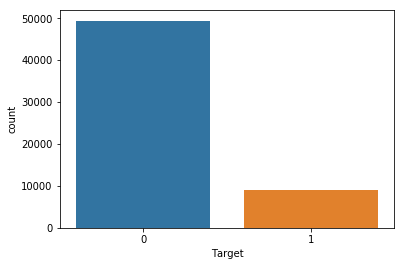

In [131]:
sns.countplot(x="Target", data=train)

In [132]:
#** se muestra desbalance de las clases del target, hay sesgo para el entrenamiento de algoritmos

###  Aplicando Undersampling

In [133]:
# Asumiendo que la clase minoritaria sea "N"

## variable target = t
t = train[["Target"]]
n_samples = t.shape[0]
n_samples_Y = (t == 0).sum()
n_samples_N = (t == 1).sum()

## si se quiere que la clase minoritaria sea el 50% del total
target_percentage = 0.5

## formula para hallar la cantidad de registros a seleccionar (de la clase mayoritaria) para el undersampling
#n_samples_Y_new =  n_samples_N / target_percentage - n_samples_N
#n_samples_Y_new_per = n_samples_Y_new / n_samples_Y
#
#dataset_undersampled = pd.concat( [train.loc[train["Target"]!=1].sample(frac=n_samples_Y_new_per, replace=False , random_state = 10) , 
#          train.loc[train["Target"]==1] ])
# reseteamos indices para evitar errores
# dataset_undersampled.reset_index(drop=True, inplace=True)


n_samples_N_new =  -target_percentage * n_samples_Y / (target_percentage- 1)-n_samples_N

 
dataset_oversampled = pd.concat( [train.loc[train["Target"]==1].sample(n = int(n_samples_N_new),
                                                                           replace=True , random_state = 10) , 
                                  train])
# reseteamos indices para evitar errores
dataset_oversampled.reset_index(drop=True, inplace=True)

In [134]:
dataset_oversampled.groupby("Target").agg('size')

Target
0    49412
1    49412
dtype: int64

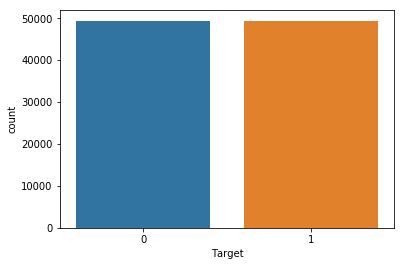

In [135]:
sns.countplot(x="Target", data=dataset_oversampled)

In [136]:
dataset_oversampled.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,flagdata,PatCamp_ID,...,Registration_Date_month,Registration_Date_day,Registration_Date_weekday,Registration_Date_hour,Registration_Date_weekend,Target,Dias_Durac_Camp,Dias_Despues_1ra_Interaccion,Rango_Edad,Qty_Interac
0,500746,6538,2004-03-23,4,0,0,0,2,1,500746_6538,...,3.0,23.0,1.0,0.0,0,1,392,409.0,1,2
1,509564,6543,2006-07-28,0,0,0,0,0,1,509564_6543,...,7.0,28.0,4.0,0.0,0,1,771,96.0,1,0
2,514365,6539,2004-12-17,0,0,0,0,0,1,514365_6539,...,12.0,17.0,4.0,0.0,0,1,189,6.0,1,0
3,517124,6536,2005-02-12,0,0,0,0,0,1,517124_6536,...,2.0,12.0,5.0,0.0,1,1,3,378.0,1,0
4,507494,6549,2005-05-30,0,0,0,0,0,1,507494_6549,...,5.0,30.0,0.0,0.0,0,1,4,239.0,1,0


### uniendo el dataframe Train balanceado con el dataframe de test

In [137]:
dfTest = datamatriz[datamatriz['flagdata'] == 2]

In [138]:
dfMatriz = pd.concat([dataset_oversampled, dfTest])

## Convirtiendo Dummies

In [139]:
df_c1_dummies=pd.get_dummies(datamatriz["Category1"], prefix = 'Category1')

In [140]:
datamatriz.City_Type.unique()

array([10,  3,  9,  4,  1,  2,  8,  5,  7,  6], dtype=int64)

In [141]:
df=pd.concat([datamatriz,df_c1_dummies],axis = 1)

In [142]:
df_c2_dummies=pd.get_dummies(datamatriz["Category2"], prefix = 'Category2')

In [143]:
df=pd.concat([df,df_c2_dummies],axis = 1)

In [144]:
df_c3_dummies=pd.get_dummies(datamatriz["Category3"], prefix = 'Category3')

In [145]:
df=pd.concat([df,df_c3_dummies],axis = 1)

In [146]:
pd.DataFrame(df.dtypes)

,0
Patient_ID,int64
Health_Camp_ID,int64
Registration_Date,datetime64[ns]
Var1,int64
Var2,int64
Var3,int64
Var4,int64
Var5,int64
flagdata,int64
PatCamp_ID,object


## Preseleccion de variable

In [147]:
# Creación DataFrame:
df = pd.DataFrame(dfMatriz)

list(df.columns)

['Patient_ID',
 'Health_Camp_ID',
 'Registration_Date',
 'Var1',
 'Var2',
 'Var3',
 'Var4',
 'Var5',
 'flagdata',
 'PatCamp_ID',
 'Camp_Start_Date',
 'Camp_End_Date',
 'Category1',
 'Category2',
 'Category3',
 'Online_Follower',
 'LinkedIn_Shared',
 'Twitter_Shared',
 'Facebook_Shared',
 'Income',
 'Education_Score',
 'Age',
 'First_Interaction',
 'City_Type',
 'Employer_Category',
 'Donation',
 'Health_Score',
 'Health Score',
 'Number_of_stall_visited',
 'Last_Stall_Visited_Number',
 'Registration_Date_year',
 'Registration_Date_month',
 'Registration_Date_day',
 'Registration_Date_weekday',
 'Registration_Date_hour',
 'Registration_Date_weekend',
 'Target',
 'Dias_Durac_Camp',
 'Dias_Despues_1ra_Interaccion',
 'Rango_Edad',
 'Qty_Interac']

In [148]:
features_to_model =[
 'Var1',
 'Var2',
 'Var3',
 'Var4',
 'Var5',
 'flagdata',
 'Category1',
 'Category2',
 'Category3',
 'Online_Follower',
 'LinkedIn_Shared',
 'Twitter_Shared',
 'Facebook_Shared',
 'Income',
 'Education_Score',
 'Age',
 'City_Type',
 'Employer_Category',
 'Donation',
 'Number_of_stall_visited',
 'Last_Stall_Visited_Number',
 'Dias_Durac_Camp',
 'Dias_Despues_1ra_Interaccion',
 'Qty_Interac',
 'Registration_Date_year',
 'Registration_Date_month',
 'Registration_Date_day',
 'Registration_Date_weekday',
 'Registration_Date_hour',
 'Registration_Date_weekend']

In [149]:
X_data = df[features_to_model]

In [150]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115570 entries, 0 to 75277
Data columns (total 30 columns):
Var1                            115570 non-null int64
Var2                            115570 non-null int64
Var3                            115570 non-null int64
Var4                            115570 non-null int64
Var5                            115570 non-null int64
flagdata                        115570 non-null int64
Category1                       115570 non-null int64
Category2                       115570 non-null int64
Category3                       115570 non-null int64
Online_Follower                 115570 non-null int64
LinkedIn_Shared                 115570 non-null int64
Twitter_Shared                  115570 non-null int64
Facebook_Shared                 115570 non-null int64
Income                          115570 non-null float64
Education_Score                 115570 non-null float64
Age                             115570 non-null float64
City_Type           

In [151]:
features_Y =[
 'Target',
 'flagdata']

In [152]:
y_data = df[features_Y]

In [153]:
# filtrar por multiples condiciones
X_data = X_data[X_data['flagdata'] == 1]

In [154]:
# filtrar por multiples condiciones
y_data = y_data[y_data['flagdata'] == 1]

In [155]:
# filtrar por multiples condiciones
#X_train = X_data[X_data['flagdata'] == 1]

In [156]:
del X_data["flagdata"]

In [157]:
del y_data["flagdata"]

In [158]:
#X_train, X_test, y_train, y_test ## 

In [159]:
# filtrar por multiples condiciones
#X_train = X_data[X_data['flagdata'] == 1]

In [160]:
#X_test = X_data[X_data['flagdata'] == 2]

In [161]:
#y_test = y_data[y_data['flagdata'] == 2]

In [162]:
#y_train = y_data[y_data['flagdata'] == 1]

In [163]:
#del y_train["flagdata"]

In [164]:
#del y_test["flagdata"]

In [165]:
#del X_test["flagdata"]

In [166]:
#del X_train["flagdata"]

In [167]:
#separar daa de training y data de prueba
#from sklearn import cross_validation
from sklearn.cross_validation import train_test_split

C:\Users\Andres\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [222]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,
                                                                     train_size= 0.70 ,
                                                                     random_state = 20)

#  Modelamiento

In [223]:
def print_mc(matriz_conf):
    matriz_conf = pd.DataFrame(matriz_conf)
    matriz_conf.index = ["Real_0","Real_1"]
    matriz_conf.columns = ["Pred_0","Pred_1"]
    print(matriz_conf)

In [224]:
################################## CURVA ROC ###############################
def graficar_roc(y_test,y_pred_proba):
    import matplotlib.pyplot as plt
    from sklearn import metrics as mt
    from sklearn.cross_validation import train_test_split

    fpr, tpr, thresholds  = mt.roc_curve(y_test.astype('int'),y_pred_proba[:,1], pos_label = 1)

    roc_auc = mt.auc(fpr, tpr)

    print ('ROC AUC: %0.4f' % roc_auc)
    gini_print = (2*roc_auc - 1)

    # Plot of a ROC curve for a specific class
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f) \nGini (2*roc_auc - 1) = %0.4f' %(roc_auc,gini_print))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

## 4. Arbol de decision

In [225]:
from sklearn.tree import DecisionTreeClassifier

In [226]:
#declarar el modelo a usar
model = DecisionTreeClassifier(max_depth=8)

In [227]:
#entrenar  (ajustar) el modelo
model = model.fit(X_train , y_train)

In [228]:
# codigo para crear las probabilidades utilizando "predict_proba"
model.predict_proba(X_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [0.25446201, 0.74553799],
       [0.25446201, 0.74553799]])

In [229]:
# pasando la probabilidad a un dataframe
dfProb = pd.DataFrame(model.predict_proba(X_test))

In [230]:
X_train.head()

,Var1,Var2,Var3,Var4,Var5,Category1,Category2,Category3,Online_Follower,LinkedIn_Shared,...,Last_Stall_Visited_Number,Dias_Durac_Camp,Dias_Despues_1ra_Interaccion,Qty_Interac,Registration_Date_year,Registration_Date_month,Registration_Date_day,Registration_Date_weekday,Registration_Date_hour,Registration_Date_weekend
30246,9,3,0,2,2,1,5,2,1,0,...,0.0,13,184.0,2,2003.0,10.0,31.0,4.0,0.0,0
2591,0,0,0,0,0,2,1,2,0,0,...,0.0,4,277.0,0,2005.0,6.0,25.0,5.0,0.0,1
10269,0,0,0,0,0,2,4,2,0,0,...,0.0,3,76.0,0,2005.0,2.0,14.0,0.0,0.0,0
52017,0,0,0,0,0,1,5,2,0,0,...,0.0,13,60.0,0,2005.0,6.0,28.0,1.0,0.0,0
8147,0,0,0,0,0,1,5,2,0,0,...,0.0,13,47.0,0,2003.0,11.0,21.0,4.0,0.0,0


In [231]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [232]:
dfRes = pd.DataFrame(dfProb)

In [233]:
df1 = pd.DataFrame(pred_test)


In [234]:
dfResulFinal = pd.concat([df1, dfProb])

In [235]:
dfResulFinal.shape

(59296, 2)

In [236]:
# Guarda datos en CSV
X_test.to_csv('dato\X_test.csv', header=True, index=False)

In [237]:
# Guarda datos en CSV
dfProb.to_csv('dato\dfProb.csv', header=True, index=False)

## Evaluacion de Modelo

In [238]:
from sklearn.metrics  import confusion_matrix
from sklearn.metrics  import accuracy_score

In [239]:
confusion_matrix(y_train,pred_train)

array([[31844,  2656],
       [   70, 34606]], dtype=int64)

In [240]:
accuracy_train = accuracy_score(y_train,pred_train)
print("el accuracy del modelo en data de training es: " , accuracy_train)

el accuracy del modelo en data de training es:  0.9605932693419683


In [241]:
confusion_matrix(y_test,pred_test)

array([[13731,  1181],
       [   33, 14703]], dtype=int64)

In [242]:
accuracy_train = accuracy_score(y_test,pred_test)
print("el accuracy del modelo en data de testing es: " , accuracy_train)

el accuracy del modelo en data de testing es:  0.9590528872099299


In [243]:
pred_proba_train = model.predict_proba(X_train)
pred_proba_test = model.predict_proba(X_test)

In [244]:
d= pd.DataFrame(pred_proba_train)

In [245]:
d[1].unique()

array([1.        , 0.80804954, 0.        , 0.50693241, 0.91768007,
       0.92075218, 0.9563591 , 0.74606299, 0.77114428, 0.74553799,
       0.3196347 , 0.89166667, 0.68      ])

ROC AUC: 0.9910


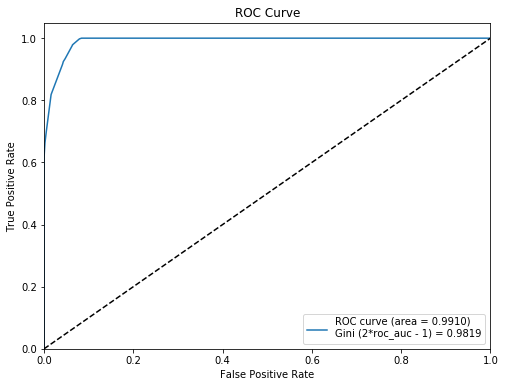

In [246]:
graficar_roc(y_test,pred_proba_test) 

In [247]:
X_testNew = df[features_to_model]

In [248]:
X_testNew = X_testNew[X_testNew['flagdata'] == 2]

In [249]:
del X_testNew["flagdata"]

In [250]:
features = pd.DataFrame()
features['feature'] = X_testNew.columns
features['importance'] = model.feature_importances_

In [251]:
ftrs = features.sort_values(by = ['importance','feature'],ascending=False)
ftrs = ftrs.reset_index(drop = True)
ftrs

,feature,importance
0,Donation,0.656393
1,Category2,0.267162
2,Category1,0.057274
3,Dias_Durac_Camp,0.005561
4,Registration_Date_month,0.005342
5,Registration_Date_day,0.003370
6,Age,0.002570
7,Dias_Despues_1ra_Interaccion,0.002047
8,Var1,0.000225
9,Var2,0.000055


In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

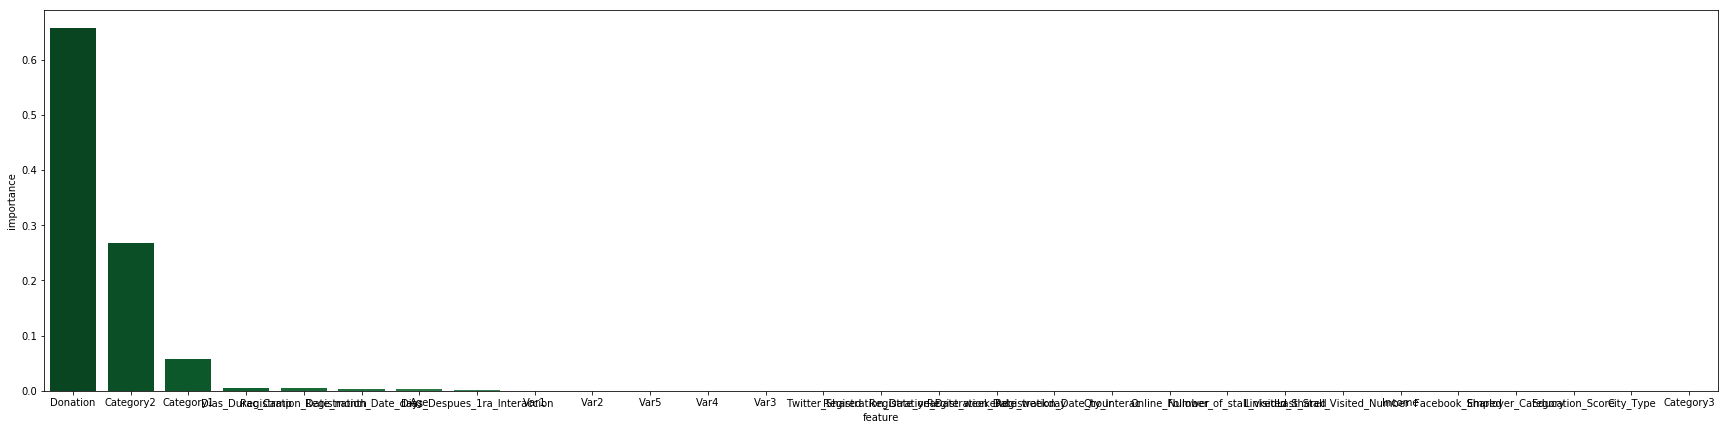

In [253]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 7))
g = sns.barplot(x='feature', y='importance', data=ftrs, order=ftrs['feature'], ax=ax, palette='BuGn_r')

In [254]:
features = pd.DataFrame()
features['feature'] = X_test.columns
features['importance'] = model.feature_importances_

In [255]:
ftrs = features.sort_values(by = ['importance','feature'],ascending=False)
ftrs = ftrs.reset_index(drop = True)
ftrs

,feature,importance
0,Donation,0.656393
1,Category2,0.267162
2,Category1,0.057274
3,Dias_Durac_Camp,0.005561
4,Registration_Date_month,0.005342
5,Registration_Date_day,0.003370
6,Age,0.002570
7,Dias_Despues_1ra_Interaccion,0.002047
8,Var1,0.000225
9,Var2,0.000055


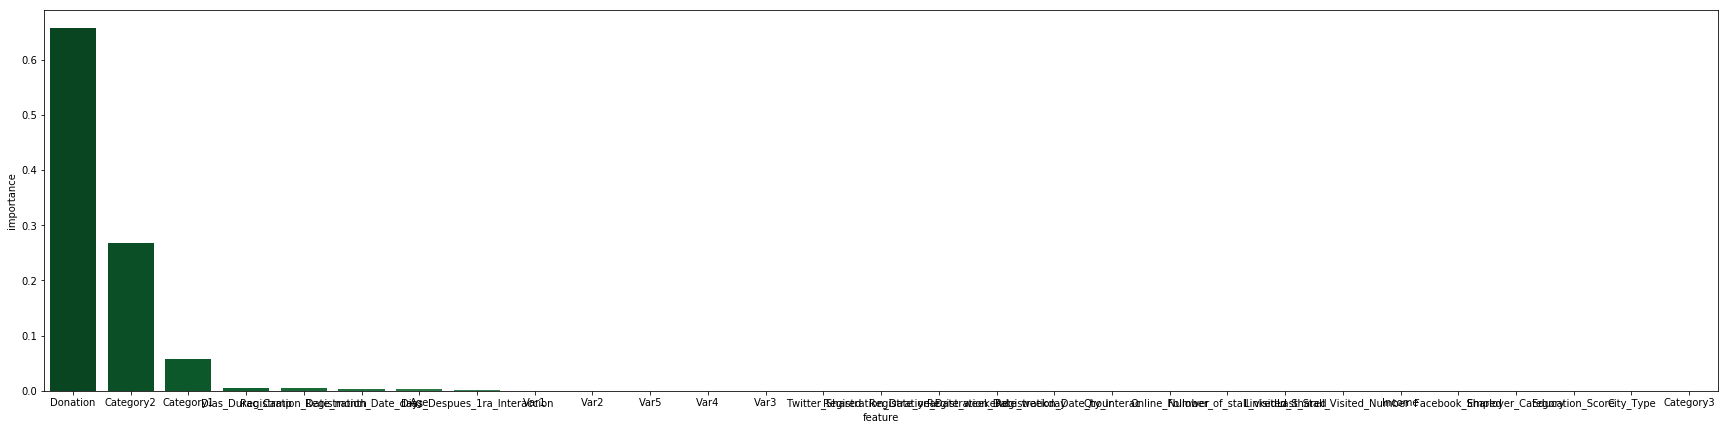

In [256]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 7))
g = sns.barplot(x='feature', y='importance', data=ftrs, order=ftrs['feature'], ax=ax, palette='BuGn_r')

In [257]:
pred_proba_testNew = model.predict_proba(X_testNew)

In [258]:
dfResultado = pd.DataFrame(pred_proba_testNew)[1].reset_index()

In [259]:
X_testNew = X_testNew.reset_index()

In [260]:
Result = pd.concat([X_testNew, dfResultado],axis = 1)

In [261]:
Result.head()

,index,Var1,Var2,Var3,Var4,Var5,Category1,Category2,Category3,Online_Follower,...,Dias_Despues_1ra_Interaccion,Qty_Interac,Registration_Date_year,Registration_Date_month,Registration_Date_day,Registration_Date_weekday,Registration_Date_hour,Registration_Date_weekend,index,1
0,9,4,0,0,0,2,1,5,2,0,...,248.0,0,2005.0,8.0,11.0,3.0,0.0,0,0,0.00000
1,24,45,5,0,0,7,2,1,2,0,...,530.0,0,2006.0,2.0,20.0,0.0,0.0,0,1,0.80805
2,25,45,5,0,0,7,1,5,2,0,...,344.0,0,2005.0,8.0,18.0,3.0,0.0,0,2,0.00000
3,26,45,5,0,0,7,3,7,2,0,...,463.0,0,2005.0,12.0,15.0,3.0,0.0,0,3,0.00000
4,27,45,5,0,0,7,3,7,2,0,...,530.0,0,2006.0,2.0,20.0,0.0,0.0,0,4,0.00000


In [262]:
Result.shape

(16746, 32)

In [263]:
Result.to_csv('dato\df22.csv', header=True, index=False)